In [1]:
import numpy as np
import os
import time
import scipy
import glob
import sys
from datetime import datetime
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

import importlib
import pandas as pd
import scipy.stats as spstats

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

In [2]:
importlib.reload(util)
util.set_sns_style(style='dark')
%matplotlib notebook

In [37]:
# if util.get_os() == 'Linux':
#     rootdir = '/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data'
# elif util.get_os() == 'Darwin':
#     rootdir = '/home/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'
# else:
#     rootdir=None
#     print("Unknown os: {}".format(util.get_os()))
rootdir = util.get_rootdir()
experiment = 'PAM_activation_fed-flies'

src_dir = os.path.join(rootdir, experiment)
# # src_dir = '/Users/julianarhee/Documents/rutalab/data/test'
# print(src_dir)
fig_id = os.path.join('/Edge_Tracking', rootdir.split('/Edge_Tracking/')[1], experiment)
print(fig_id)
savedir = '{}/jyr/{}'.format(rootdir, experiment)
savedir = savedir.replace(" ", "")
figdir = os.path.join(savedir, 'figures')
print("Saving figures to:{}    {}".format('\n', figdir))
if not os.path.exists(figdir):
    os.makedirs(figdir)

/Edge_Tracking/Data/PAM_activation_fed-flies
Saving figures to:
    /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures


In [46]:
# copy files?
import shutil
copy_files=False
if copy_files:
    for tmp_src in os.listdir(os.path.join(src_dir, 'multiple_reinforcement')):
        curr_logs = glob.glob(os.path.join(src_dir, 'multiple_reinforcement', tmp_src, '*.log'))
        for fn in curr_logs:
            fbase = os.path.split(fn)[-1]
            shutil.copy(fn, os.path.join(savedir, fbase))


In [49]:
src_dir = os.path.join(savedir, 'raw')
sorted(os.listdir(src_dir), key=util.natsort)

['09142020-103649_Fly1_fed_no_lights.log',
 '09142020-104819_Fly1_fed_single.log',
 '09142020-110009_Fly1_fed_lights.log',
 '09142020-141218_Fly1_fed_no_lights_001.log',
 '09142020-142439_Fly1_fed_single_002.log',
 '09142020-143631_Fly1_fed_lights_003.log',
 '09142020-151256_Fly2_fed_no_lights_001.log',
 '09142020-152542Fly2_fed_single_002.log',
 '09142020-154113_Fly2_fed_lights_003.log',
 '09162020-145434_Fly1_fed_no_lights_001.log',
 '09162020-150636_Fly1_fed_single_002.log',
 '09162020-151913_Fly1_fed_lights_003.log',
 '09232020-174714_Fly1_PAMChr_fed_no_lights.log',
 '09232020-180045_Fly1_PAMChr_fed_single.log',
 '09232020-181222_Fly1_PAMChr_fed_lights.log',
 '09252020-111252_Fly1_PAMChr_fed_no_lights.log',
 '09252020-112354_Fly1_PAMChr_fed_single.log',
 '09252020-113910_Fly1_PAMChr_fed_lights.log',
 '09252020-145859_Fly2_PAMChr_fed_no_lights.log',
 '09252020-151208_Fly2_PAMChr_fed_single.log',
 '09252020-152623_Fly2_PAMChr_fed_lights.log']

In [86]:
log_files = butil.get_log_files(src_dir=src_dir, experiment=experiment, verbose=False, is_gdrive=False,
                        return_loginfo=False)

Checking parent dir.
Found 21 tracking files.


In [87]:
importlib.reload(butil)

<module 'behavior' from '/home/julianarhee/Repositories/plume-tracking/behavior.py'>

Processing 21 tracking files.


<IPython.core.display.Javascript object>


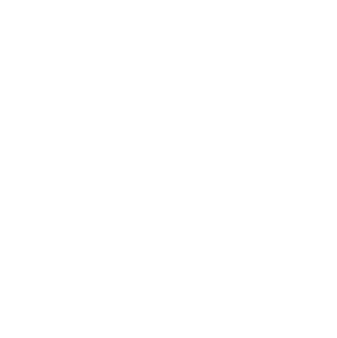

[WARNING] 09252020-111252_Fly1_PAMChr_fed_no_lights: Found bad skips, removing 15661 of 35873 samples.
--> found bad skips in FTs, check: 09252020-111252_Fly1_PAMChr_fed_no_lights


<IPython.core.display.Javascript object>


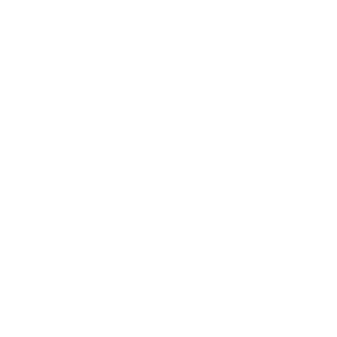

[WARNING] 09252020-112354_Fly1_PAMChr_fed_single: Found bad skips, removing 6494 of 39566 samples.
--> found bad skips in FTs, check: 09252020-112354_Fly1_PAMChr_fed_single
Correcting experiment conditions: PAM_activation_fed-flies
Saving combined df to: /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies
Found 3 conditions:
pamchr_fed_no_lights
pamchr_fed_single
pamchr_fed_lights


In [88]:
strip_width=50
strip_sep=200
# is_csv = False
df0_all = butil.load_combined_df(log_files=log_files, logdf=None, 
                                is_csv=False, experiment=experiment, 
                                savedir=savedir, save_errors=True, create_new=True,
                                parse_filename=True, remove_invalid=True, process=True)
#df0_all = df0_all.rename(columns={'Unnamed: 0': 'frame'})
condition_list = df0_all['condition'].unique()
print("Found {} conditions:".format(len(condition_list)))
for c in condition_list:
    print(c)

In [74]:
curr_conds = ['pamchr_fed_lights']

df0 = df0_all[df0_all['condition'].isin(curr_conds)].copy()


In [90]:
importlib.reload(butil)

<module 'behavior' from '/home/julianarhee/Repositories/plume-tracking/behavior.py'>

<IPython.core.display.Javascript object>


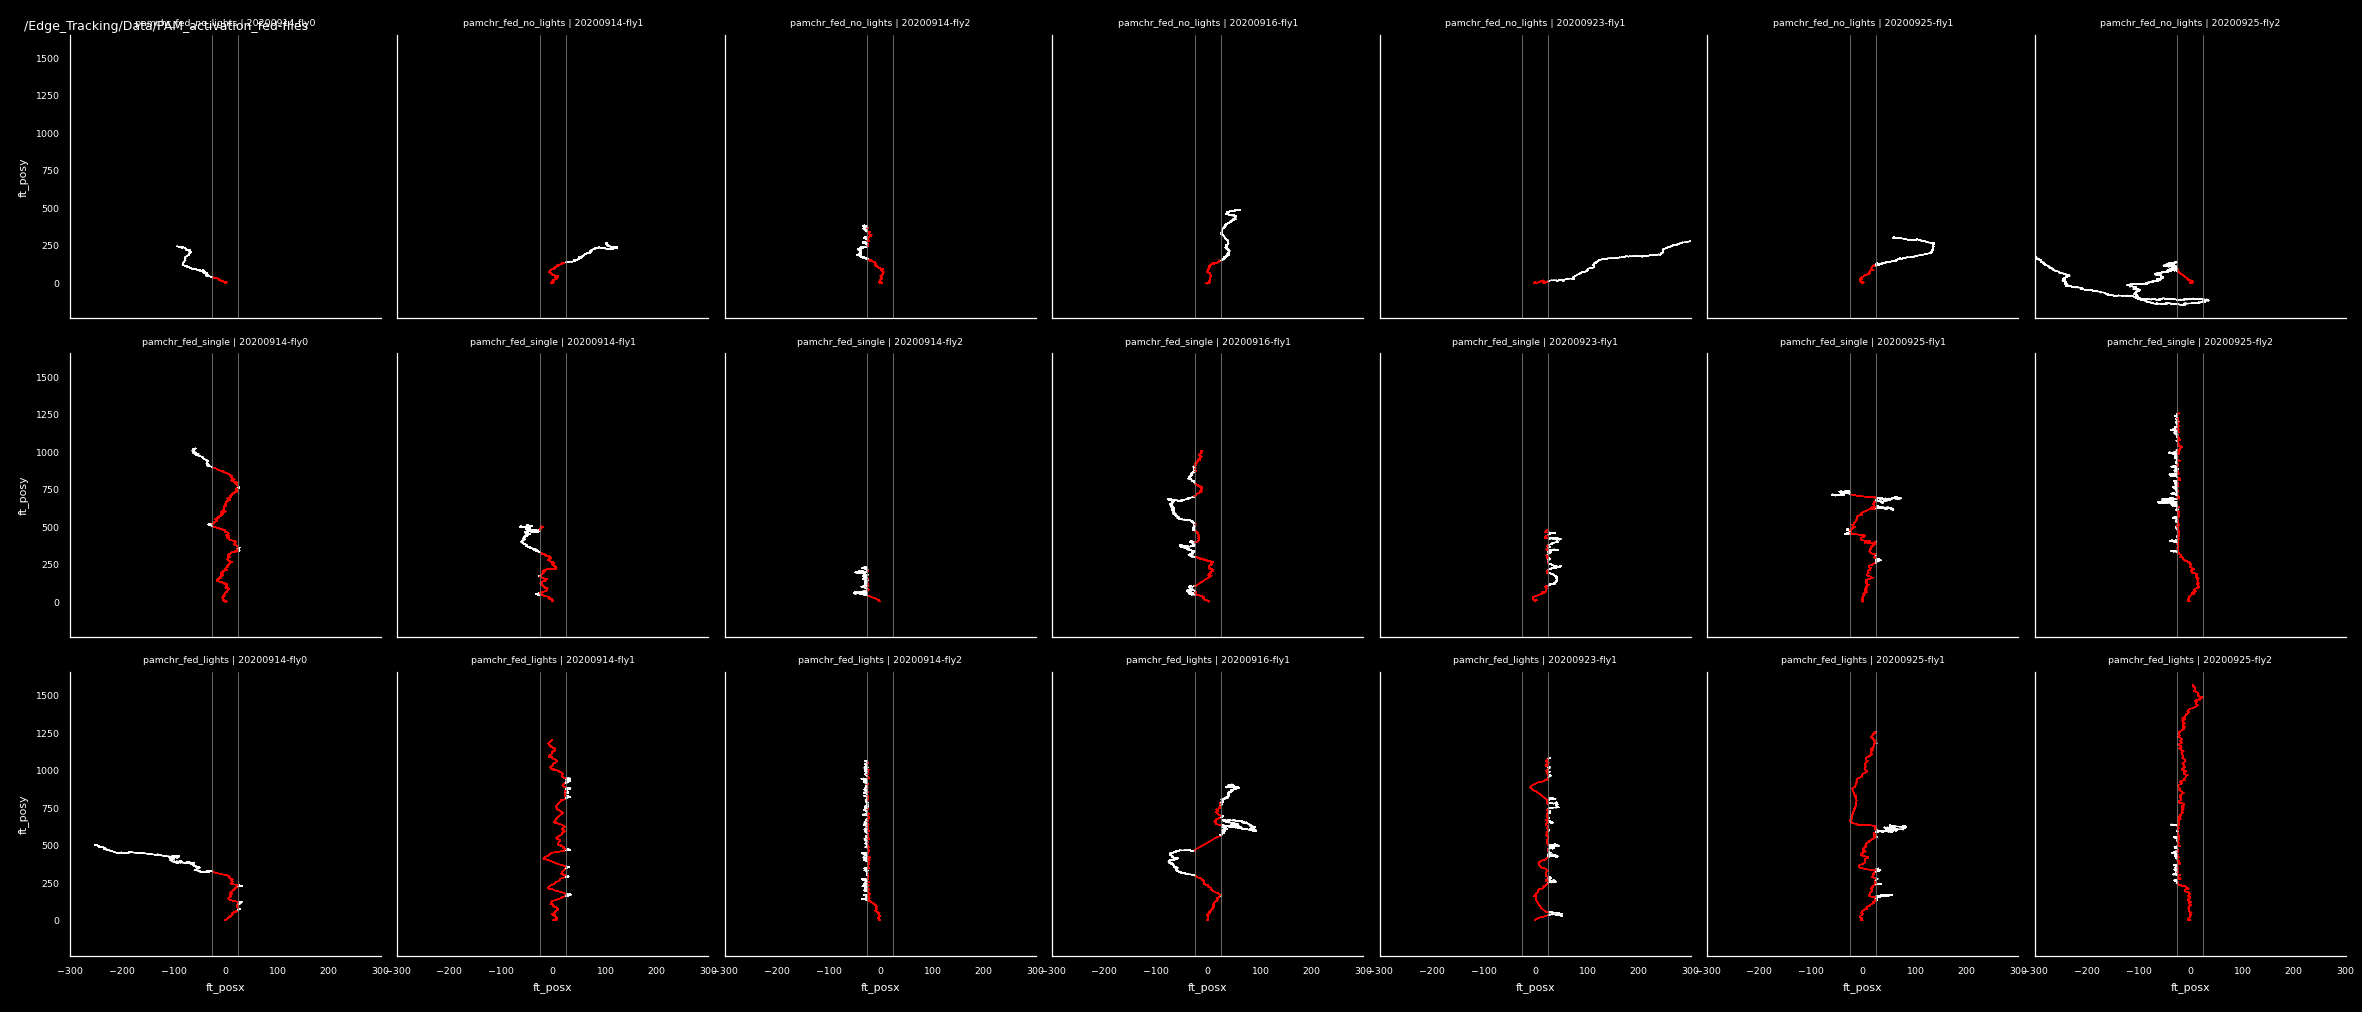

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures traj-all-by-cond


In [91]:

# plot fly x cond
fig = butil.plot_fly_by_condition(df0_all, strip_width=strip_width,
                                 row_order=['pamchr_fed_no_lights', 'pamchr_fed_single', 'pamchr_fed_lights'])
# save
figname = 'traj-all-by-cond'
util.label_figure(fig, fig_id)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname))) #, dpi=dpi)
print(figdir, figname)


In [ ]:
nc=7; nr=3;
fig, axn = pl.subplots(nr, nc, figsize=(nc*2, nr*2.5))
for ai, (ax, (trial_id, df)) in enumerate(zip(axn.flat, df_fp.groupby('trial_id'))):
    plotb = df[(df['boutnum']>=2)].copy() #* (df['boutnum'].isin(longbouts))].copy()
    strip_borders = butil.find_strip_borders(df, strip_width=strip_width, strip_sep=strip_sep,
                                             is_grid=True, get_all_borders=True)
    butil.plot_trajectory(plotb, ax=ax,odor_bounds=strip_borders, markersize=0.25)
    if ai==(nc-1):
        ax.legend(bbox_to_anchor=(1,1), loc='lower right', fontsize=6)
    else:
        ax.legend_.remove()
    ax.set_title('{}: {}'.format(ai, trial_id), fontsize=5)
for ax in axn.flat[len(trial_ids):]:
    ax.axis('off')
pl.subplots_adjust(wspace=0.5, hspace=0.5, right=0.95, left=0.05)
util.label_figure(fig, fig_id)

figname = 'inout_traj_all_flies'
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(figdir, figname)